0.0
1.0
0.24197072451914337


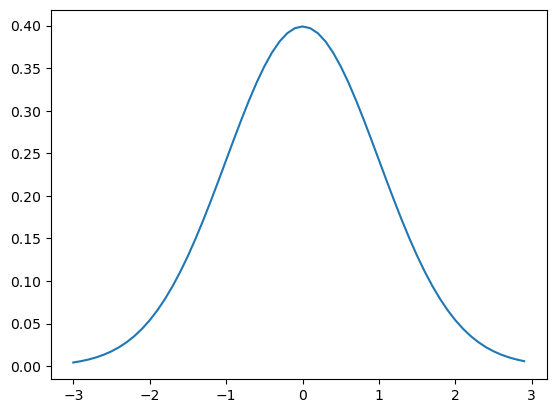

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

sn = stats.norm(loc = 0, scale = 1)

print(sn.mean())
print(sn.std())
print(sn.pdf(x = 1))

x_plot = np.arange(-3.0, 3.0, 0.1)

plt.plot(x_plot, stats.norm.pdf(loc = 0, scale = 1, x = x_plot))

<AxesSubplot:ylabel='Density'>

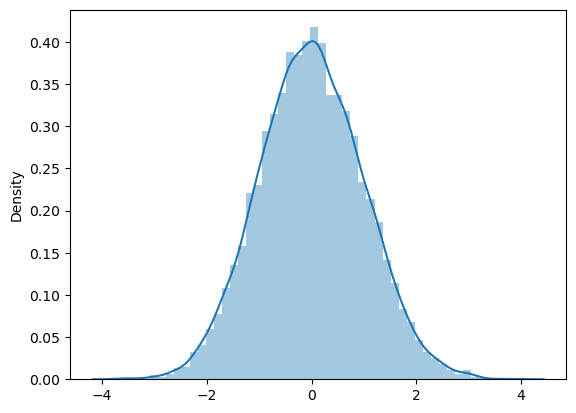

In [2]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

sn = stats.norm.rvs(loc = 0, scale = 1, size = 10000)
sn.mean()
sn.std()

sns.distplot(sn)

<AxesSubplot:ylabel='Density'>

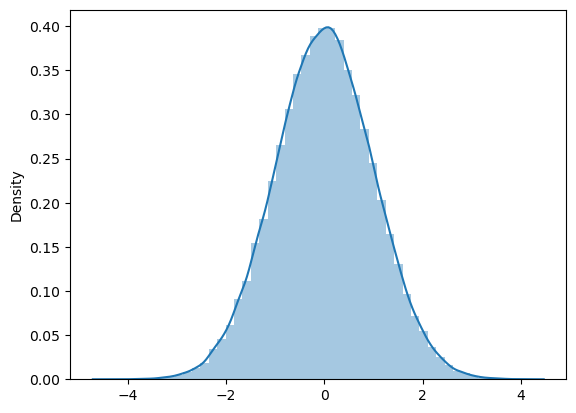

In [3]:
nr = np.random.randn(100000)

sns.distplot(nr)

<AxesSubplot:>

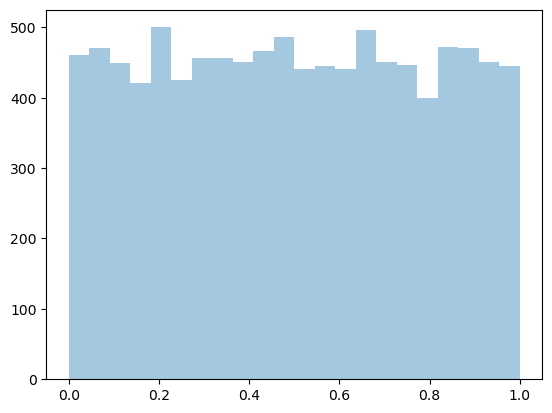

In [4]:
nr1 = np.random.rand(10000)

sns.distplot(nr1, kde = False)

기계 학습 알고리즘은 종종 입력 데이터를 2차원 배열 형태로 받습니다. 일반적으로 각 행(row)은 개별 샘플(sample)을 나타내고, 각 열(column)은 특성(feature)을 나타냅니다.

이 경우 X는 100x1의 2차원 배열입니다. 100은 데이터의 샘플 개수를 나타내고, 1은 특성의 개수를 나타냅니다. 즉, 이 데이터 세트에는 100개의 샘플과 1개의 특성이 있습니다.

만약 X를 1차원 배열로 만든다면, 그것은 100개의 원소를 가진 배열이 될 것입니다. 이것은 여전히 100개의 샘플을 나타냅니다만, 이는 대부분의 기계 학습 알고리즘에 직접적으로 입력으로 사용될 수 없습니다. 그 이유는 대부분의 알고리즘이 예상하고 있는 데이터의 형태가 각 샘플의 특성들을 포함하는 2차원 배열이기 때문입니다.

따라서 X를 2차원 배열로 만드는 이유는 이러한 기계 학습 알고리즘과의 호환성을 유지하기 위한 것입니다.

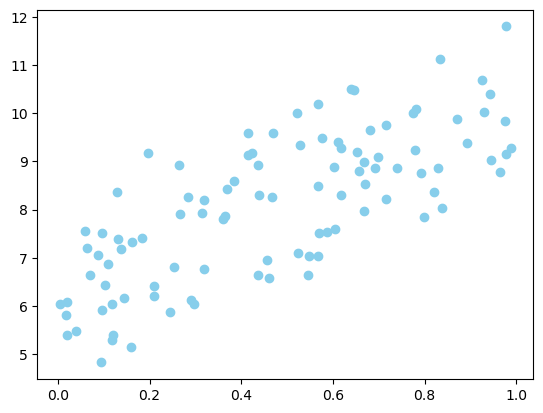

In [5]:
import pandas as pd

np.random.seed(0)

X = np.random.rand(100, 1) #  0 과 1 사이에 균일 분포 에서 무작위 실수를 생성
y = 6 + 4 * X + np.random.randn(100, 1)
# y = 6 + 4 * X

plt.scatter(X, y, c = 'skyblue')

plt.show()

[비용 최소화]  

- 비용함수 R(w)는 변수가 w 파라미터로 이뤄진 함수이며 R(w)를 최소화하는 w0와 w1의 값은 R(w)를 w0, w1으로 순차적으로 편미분해 얻을 수 있다.  
 w1 편미분값 : $-2/N*sigmax*diff$, w0 편미분값 : $-2/N*sigma*diff$
- 업데이트는 새로운 w1을 이전 w1에서 편미분 결과값을 마이너스 하면서 적용한다. 
- 편미분값이 너무 클 수 있기 때문에 보정 계수를 곱하는데 이를 학습률이라고 한다.

In [6]:
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01) :
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    w0_factors = np.ones((N,1))
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    return w1_update, w0_update

In [7]:
# 반복적으로 경사 하강법을 이용하여 get_weight_updates 를 호출하여 w1과 w0를 업데이트 하는 함수
# 입력인자 iters로 주어진 횟수 만클 반복적으로 w1과 w0를 업데이트 적용함

def gradient_descent_steps(X, y, iters = 10000) :
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    for ind in range(iters) :
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [8]:
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print('w1 : {0:.4f} w0 : {1:.4f}'.format(w1[0,0], w0[0,0]))

y_pred = w1[0,0] * X + w0
print('GD total cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 3.7740 w0 : 6.3047
GD total cost : 0.9947


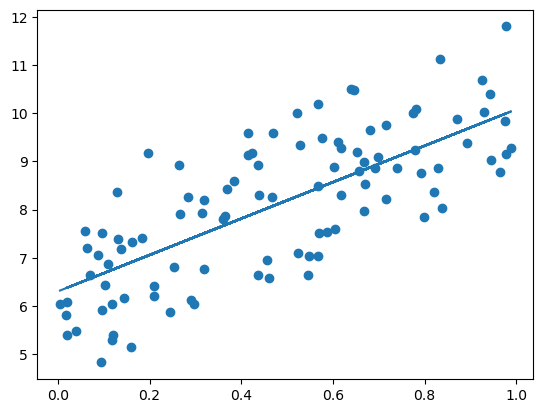

In [9]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [10]:
# permutation

X1 = np.array([
            [1, 2, 3],
            [4, 5, 6],
            [7, 8, 9],
            [10, 11, 12]
             ])

print(X1.shape, '\n')

random_index = np.random.permutation(X1)
print(random_index)

(4, 3) 

[[ 7  8  9]
 [ 4  5  6]
 [ 1  2  3]
 [10 11 12]]


In [11]:
# 확률적 경사 하강법 : 대용량 데이터의 경우 일부 데이터만 이용하여 w가 업데이트 되는 값을 구함

def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000) :
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters) :
        np.random.seed(ind)
        
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [12]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print('w1 :', round(w1[0, 0], 3), 'w0 : ', round(w0[0, 0], 3))

y_pred = w1[0, 0] * X + w0
print('stochastic gradient descent total cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 3.79 w0 :  6.291
stochastic gradient descent total cost : 0.9942
